#  Projeto Deep Learning

## Importações

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import zipfile


from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input



## Carregamento do CSV e Verificação de imagens

In [ ]:
gdrive=True
if gdrive:
    from google.colab import drive
    drive.mount('/content/drive')
    path = "/content/drive/MyDrive/DL"
else:
    path = "."

Mounted at /content/drive


In [ ]:
metadata_path = "/content/drive/MyDrive/DL/metadata.csv"
meta_data = pd.read_csv(metadata_path)

#base_dir = "/Users/joaosantos/Documents/Mestrado Joao/2 semestre/Deep Learning/rare_specie"

In [ ]:
if gdrive:
  # Extract the files into the "rare_species" folder
  zip_path = path + '/rare_species_div.zip'
  z = zipfile.ZipFile(zip_path)

  # Create the extraction folder if it does not exist
  os.makedirs("rare_species_div", exist_ok=True)

  # Extract the files into the "rare_species" folder
  z.extractall("rare_species_div")

  del z

In [ ]:
base_dir= "/content/rare_species_div"

In [ ]:
def check_image_exists(image_file):
    for root, dirs, files in os.walk(base_dir):
        if image_file in files:
            return True
    return False

In [ ]:
missing_images = []
for index, row in meta_data.iterrows():
    image_path = row['file_path']
    image_name = os.path.basename(image_path)
    if not check_image_exists(image_name):
        missing_images.append(image_path)

print(f"Número de imagens em falta: {len(missing_images)}")

KeyboardInterrupt: 

## Load Images
Carregar imagens visto que cada pasta é uma classe (familia) e dar one hot enconding nas classes , ou seja,
X_data são imagens e y_data são rótulos/classes codificados


Resizing usando 224x224, pois medidas mais baixas fazem perder qualidade de imagem e consequentemente pioram a performance

In [ ]:
# Função para remover fundo da imagem
def remove_background(input_path, output_path):
    try:
        print(f"Removendo fundo da imagem: {input_path}")
        # Executa o rembg para remover o fundo
        result = subprocess.run(['rembg', 'i', input_path, output_path], check=True, capture_output=True, text=True)
        if result.returncode == 0:
            print(f"Fundo removido com sucesso de {input_path}. Salvo em {output_path}")
        else:
            print(f"Erro ao processar {input_path}: {result.stderr}")
    except subprocess.CalledProcessError as e:
        print(f"Erro ao processar {input_path}: {e}")

In [ ]:
# # Funcão para carregar imagens e dar one hot enconding
# def load_local_images(base_dir, image_size=(224, 224)):
#     X_data = []
#     y_data = []

#     # Obter os rótulos
#     labels = os.listdir(base_dir)
#     labels = [label for label in labels if os.path.isdir(os.path.join(base_dir, label)) and not label.startswith('.')]
#     label_map = {label: idx for idx, label in enumerate(labels)}

#     for label in labels:
#         class_dir = os.path.join(base_dir, label)
#         for img_name in os.listdir(class_dir):
#             img_path = os.path.join(class_dir, img_name)
#             img = cv2.imread(img_path)
#             if img is None:
#                 print(f"Erro:{img_path}")
#                 continue
#             img = cv2.resize(img, image_size)
#             X_data.append(img)
#             y_data.append(label_map[label])

#     X_data = np.array(X_data, dtype="float32")
#     y_data = np.array(y_data)

#     # One-hot encoding
#     num_classes = len(labels)
#     y_data = to_categorical(y_data, num_classes=num_classes)

#     print(f"Classes encontradas: {labels}")
#     return X_data, y_data



In [ ]:
# #Carregar os dados
# image_size = (224, 224)
# X_data, y_data = load_local_images(base_dir, image_size=image_size)

# #Divisão
# X_train, X_test, y_train, y_test = train_test_split(
#     X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
# )

# print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
# print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# num_classes = y_train.shape[1]

# # Augmentation
# train_aug = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=20,
#     zoom_range=0.15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True
# )
# test_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

# # Criação dos datasets com flow
# batch_size = 32
# train_dataset = train_aug.flow(X_train, y_train, batch_size=batch_size)
# test_dataset = test_aug.flow(X_test, y_test, batch_size=batch_size)

Classes encontradas: ['chordata_balaenidae', 'chordata_ardeidae', 'chordata_pleuronectidae', 'chordata_goodeidae', 'chordata_plethodontidae', 'chordata_labridae', 'cnidaria_agariciidae', 'mollusca_cardiidae', 'chordata_cervidae', 'arthropoda_papilionidae', 'chordata_dasypodidae', 'chordata_turdidae', 'chordata_recurvirostridae', 'chordata_tropiduridae', 'chordata_vombatidae', 'cnidaria_dendrophylliidae', 'chordata_carettochelyidae', 'chordata_hylobatidae', 'chordata_soricidae', 'cnidaria_faviidae', 'chordata_balaenicipitidae', 'chordata_strigopidae', 'chordata_gliridae', 'chordata_daubentoniidae', 'chordata_paradisaeidae', 'arthropoda_pseudophasmatidae', 'chordata_diomedeidae', 'chordata_bovidae', 'chordata_parulidae', 'chordata_laridae', 'chordata_vireonidae', 'chordata_cebidae', 'chordata_callitrichidae', 'arthropoda_formicidae', 'chordata_diplodactylidae', 'cnidaria_fungiidae', 'chordata_vespertilionidae', 'chordata_ambystomatidae', 'chordata_scolopacidae', 'chordata_equidae', 'chor

Rita:

In [ ]:
# Definições
image_size = (224, 224)
batch_size = 32

# Augmentation para treino
train_aug = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Apenas preprocessamento para teste
test_aug = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [ ]:
base_path=os.getcwd()+ '/rare_species_div'
base_path

'/content/rare_species_div'

In [ ]:
train_dir = base_path+ '/train'
test_dir = base_path+ '/test'

In [ ]:

train_dataset = train_aug.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_dataset = test_aug.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Verificar o shape dos batches
for X_batch, y_batch in train_dataset:
    print(f"X_train batch shape: {X_batch.shape}, y_train batch shape: {y_batch.shape}")
    break

for X_batch, y_batch in test_dataset:
    print(f"X_test batch shape: {X_batch.shape}, y_test batch shape: {y_batch.shape}")
    break

# Número de classes
num_classes = train_dataset.num_classes
print(f"Num classes: {num_classes}")

Found 9586 images belonging to 202 classes.
Found 2397 images belonging to 202 classes.
X_train batch shape: (32, 224, 224, 3), y_train batch shape: (32, 202)
X_test batch shape: (32, 224, 224, 3), y_test batch shape: (32, 202)
Num classes: 202


Termina parte Rita

## Model

Sem weigths

In [ ]:
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_tensor=Input(shape=(224, 224, 3)))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy", "AUC"]
)

# Callbacks
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
checkpoint = ModelCheckpoint("melhor_modelo.keras", save_best_only=True, monitor="val_loss", verbose=1)

#Treinamento, com base congelada
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=2
)

#Fine-tuning
base_model.trainable = True
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy", "AUC"]
)

#Treinamento, com base descongelada
fine_tune_history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_2']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (115600000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



Epoch 1: val_loss improved from inf to 4.40035, saving model to melhor_modelo.keras
300/300 - 476s - 2s/step - AUC: 0.6697 - accuracy: 0.0797 - loss: 4.9489 - val_AUC: 0.8178 - val_accuracy: 0.2165 - val_loss: 4.4003 - learning_rate: 1.0000e-04
Epoch 2/30

Epoch 2: val_loss improved from 4.40035 to 3.69721, saving model to melhor_modelo.keras
300/300 - 382s - 1s/step - AUC: 0.8025 - accuracy: 0.1902 - loss: 4.2049 - val_AUC: 0.9018 - val_accuracy: 0.3062 - val_loss: 3.6972 - learning_rate: 1.0000e-04
Epoch 3/30

Epoch 3: val_loss improved from 3.69721 to 3.14595, saving model to melhor_modelo.keras
300/300 - 374s - 1s/step - AUC: 0.8749 - accuracy: 0.2650 - loss: 3.6167 - val_AUC: 0.9427 - val_accuracy: 0.3663 - val_loss: 3.1460 - learning_rate: 1.0000e-04
Epoch 4/30

Epoch 4: val_loss improved from 3.14595 to 2.71600, saving model to melhor_modelo.keras
300/300 - 367s - 1s/step - AUC: 0.9186 - accuracy: 0.3300 - loss: 3.1371 - val_AUC: 0.9609 - val_accuracy: 0.4414 - val_loss: 2.7160

com weigths

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
labels = train_dataset.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights calculados:", class_weight_dict)

Class weights calculados: {0: np.float64(0.39546204620462044), 1: np.float64(1.9773102310231023), 2: np.float64(0.9886551155115512), 3: np.float64(1.9773102310231023), 4: np.float64(1.9773102310231023), 5: np.float64(0.20367144010538393), 6: np.float64(0.9886551155115512), 7: np.float64(1.9773102310231023), 8: np.float64(1.9773102310231023), 9: np.float64(1.9773102310231023), 10: np.float64(1.9773102310231023), 11: np.float64(1.9773102310231023), 12: np.float64(1.9773102310231023), 13: np.float64(1.9773102310231023), 14: np.float64(1.9773102310231023), 15: np.float64(1.9773102310231023), 16: np.float64(1.9773102310231023), 17: np.float64(0.49953100573215214), 18: np.float64(0.6591034103410341), 19: np.float64(0.9886551155115512), 20: np.float64(1.9773102310231023), 21: np.float64(1.9773102310231023), 22: np.float64(1.9773102310231023), 23: np.float64(0.9886551155115512), 24: np.float64(0.9886551155115512), 25: np.float64(0.3295517051705171), 26: np.float64(0.9886551155115512), 27: np.f

In [ ]:
# === MODELO BASE ===
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy", "AUC"]
)

# === CALLBACKS ===
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
checkpoint = ModelCheckpoint("melhor_modelo.keras", save_best_only=True, monitor="val_loss", verbose=1)

# === TREINO COM BASE CONGELADA ===
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=2,
    class_weight=class_weight_dict
)

# === FINE-TUNING ===
base_model.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy", "AUC"]
)

fine_tune_history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stop, reduce_lr],
    verbose=2,
    class_weight=class_weight_dict
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (115600000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



Epoch 1: val_loss improved from inf to 4.90048, saving model to melhor_modelo.keras
300/300 - 471s - 2s/step - AUC: 0.5953 - accuracy: 0.0198 - loss: 5.2844 - val_AUC: 0.7697 - val_accuracy: 0.1527 - val_loss: 4.9005 - learning_rate: 1.0000e-04
Epoch 2/30

Epoch 2: val_loss improved from 4.90048 to 4.40663, saving model to melhor_modelo.keras
300/300 - 404s - 1s/step - AUC: 0.7552 - accuracy: 0.0856 - loss: 4.7932 - val_AUC: 0.9001 - val_accuracy: 0.3166 - val_loss: 4.4066 - learning_rate: 1.0000e-04
Epoch 3/30

Epoch 3: val_loss improved from 4.40663 to 3.76296, saving model to melhor_modelo.keras
300/300 - 376s - 1s/step - AUC: 0.8572 - accuracy: 0.2034 - loss: 4.2008 - val_AUC: 0.9472 - val_accuracy: 0.4013 - val_loss: 3.7630 - learning_rate: 1.0000e-04
Epoch 4/30

Epoch 4: val_loss improved from 3.76296 to 3.16728, saving model to melhor_modelo.keras
300/300 - 370s - 1s/step - AUC: 0.9074 - accuracy: 0.2897 - loss: 3.5732 - val_AUC: 0.9612 - val_accuracy: 0.4639 - val_loss: 3.1673

Check some information about scores:

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregar o modelo salvo
modelo_final = load_model("melhor_modelo.keras")

# Previsões
y_pred_probs = modelo_final.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Histórico guardado em training_history.csv


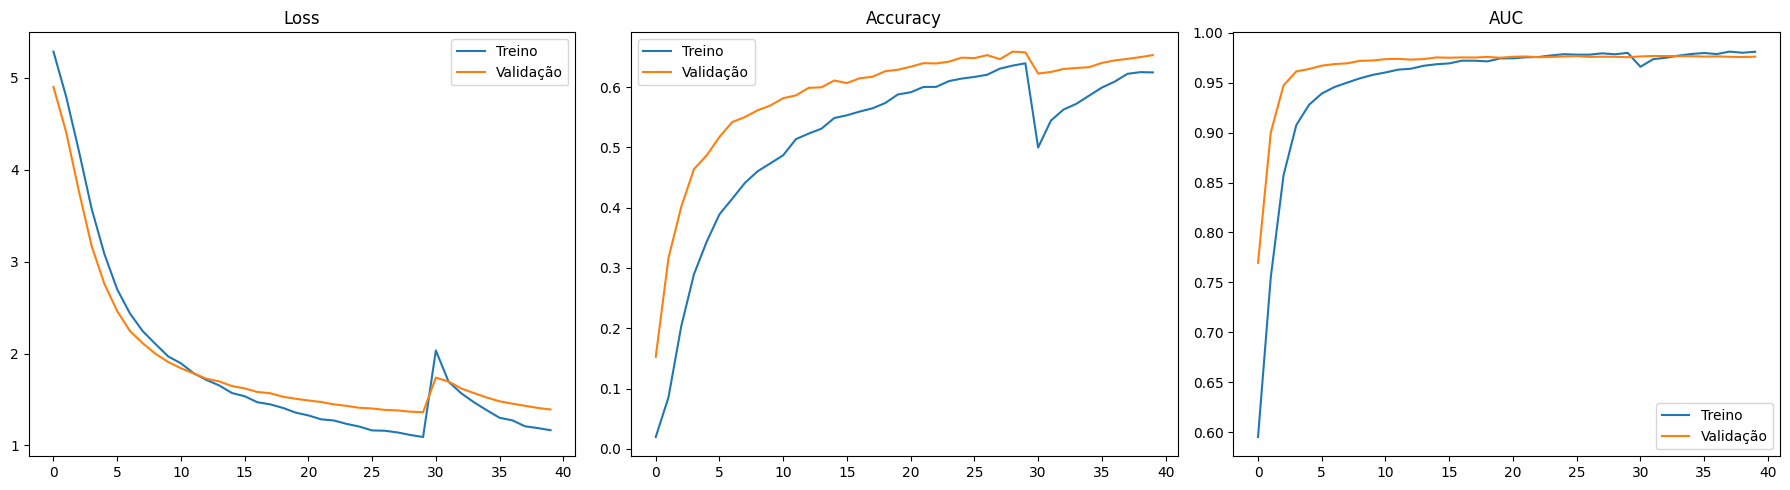

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━

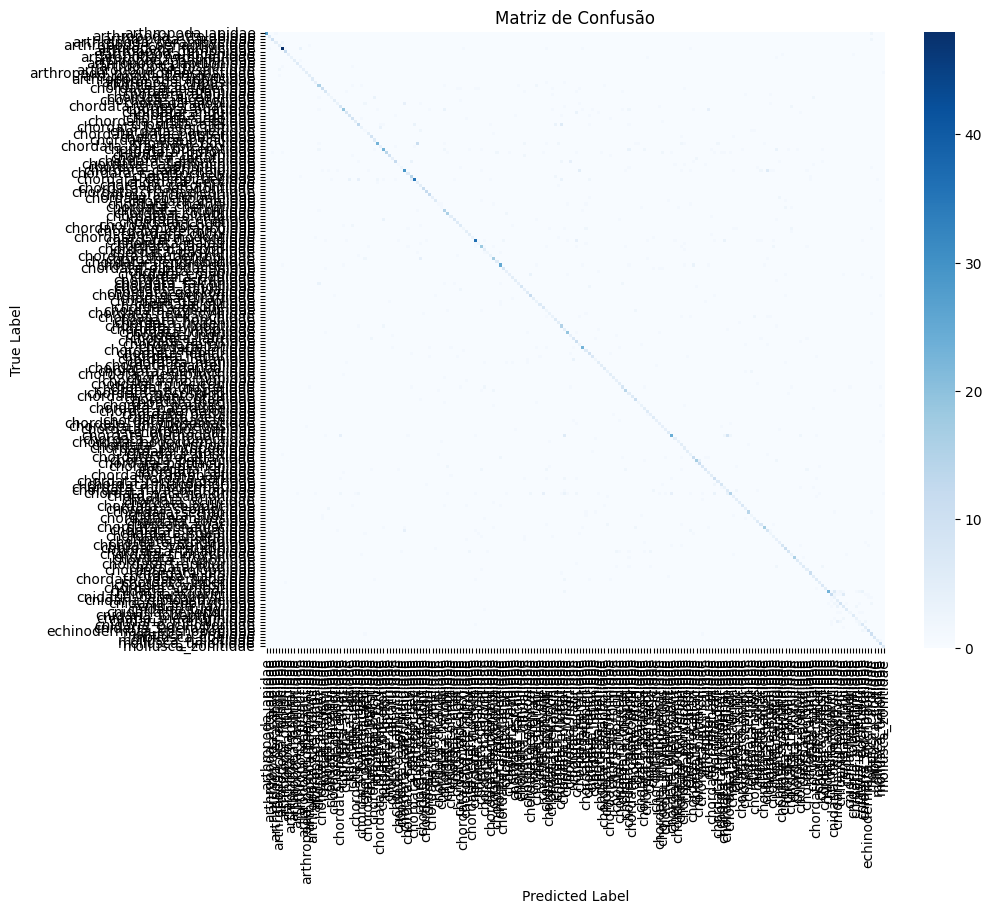


Relatório de Classificação:
                              precision    recall  f1-score   support

           arthropoda_apidae       1.00      0.90      0.95        30
      arthropoda_attelabidae       0.75      1.00      0.86         6
        arthropoda_carabidae       0.91      0.77      0.83        13
     arthropoda_cerambycidae       0.83      0.71      0.77         7
   arthropoda_coenagrionidae       0.62      0.83      0.71         6
       arthropoda_formicidae       0.89      0.84      0.86        57
        arthropoda_gomphidae       0.86      1.00      0.92        12
        arthropoda_lucanidae       1.00      0.67      0.80         6
      arthropoda_nymphalidae       1.00      0.60      0.75         5
      arthropoda_palinuridae       1.00      0.83      0.91         6
     arthropoda_papilionidae       0.86      1.00      0.92         6
       arthropoda_pisauridae       0.44      0.67      0.53         6
   arthropoda_platystictidae       1.00      0.67      0.80 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

# --- 1. Guardar histórico do treino ---

def save_history(history, fine_tune_history, filename='training_history.csv'):
    # Junta os históricos
    def extract_data(hist):
        return pd.DataFrame(hist.history)

    combined_history = pd.concat([extract_data(history), extract_data(fine_tune_history)], ignore_index=True)
    combined_history.to_csv(filename, index=False)
    print(f"Histórico guardado em {filename}")

# --- 2. Plotar curvas de treino ---

def plot_history(history, fine_tune_history):
    def merge(hist1, hist2, metric):
        return hist1.history[metric] + hist2.history[metric]

    epochs_range = range(len(history.history['loss']) + len(fine_tune_history.history['loss']))

    plt.figure(figsize=(18, 5))

    # Loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, merge(history, fine_tune_history, 'loss'), label='Treino')
    plt.plot(epochs_range, merge(history, fine_tune_history, 'val_loss'), label='Validação')
    plt.title('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, merge(history, fine_tune_history, 'accuracy'), label='Treino')
    plt.plot(epochs_range, merge(history, fine_tune_history, 'val_accuracy'), label='Validação')
    plt.title('Accuracy')
    plt.legend()

    # AUC
    plt.subplot(1, 3, 3)
    plt.plot(epochs_range, merge(history, fine_tune_history, 'AUC'), label='Treino')
    plt.plot(epochs_range, merge(history, fine_tune_history, 'val_AUC'), label='Validação')
    plt.title('AUC')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- 3. Matriz de confusão ---

def plot_confusion_matrix(model, dataset, class_names):
    # Gerar previsões
    y_true = []
    y_pred = []

    for images, labels in dataset:
        preds = model.predict(images)
        y_true.extend(np.argmax(labels, axis=1))
        y_pred.extend(np.argmax(preds, axis=1))

        if len(y_true) >= dataset.samples:
            break

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Matriz de Confusão')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred, target_names=class_names))

# --- 4. Guardar modelo final ---

def save_model(model, filename='modelo_final.keras'):
    model.save(filename)
    print(f"Modelo final guardado em {filename}")

# =========================================================
# 🚀 Usa as funções depois de treinares:

# Guardar histórico
save_history(history, fine_tune_history)

# Plotar as curvas
plot_history(history, fine_tune_history)

# Matriz de confusão
plot_confusion_matrix(model, test_dataset, list(train_dataset.class_indices.keys()))

# Guardar o modelo final
save_model(model)


------------------------------

### Tentativa errada de tentar aplicar deeplab3

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import DenseNet201

# Caminho para o diretório com as imagens
base_dir = "/Users/joaosantos/Documents/Mestrado Joao/2 semestre/Deep Learning/rare_speciee"

def load_deeplab_model(input_size=(512, 512)):
    """Carrega o modelo DeepLabV3+ pré-treinado do TensorFlow (usando DenseNet201 como substituto)."""
    deeplab_model = tf.keras.applications.DenseNet201(input_shape=input_size + (3,), include_top=False, weights='imagenet')
    return deeplab_model

def segment_image(model, image_path, target_size=(512, 512)):
    """Aplica o modelo DeepLabV3+ para segmentação de uma imagem."""
    try:
        img = image.load_img(image_path, target_size=target_size)
    except (IOError, UnidentifiedImageError) as e:
        print(f"Erro ao carregar a imagem {image_path}: {e}")
        return None  # Retorna None para indicar que a imagem não foi carregada corretamente

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normaliza a imagem

    # Realiza a segmentação
    predictions = model.predict(img_array)

    # Convertendo a previsão em uma máscara binária
    prediction_mask = np.argmax(predictions[0], axis=-1)
    return prediction_mask

def apply_mask(image_path, mask, target_size=(64, 64)):
    """Aplica a máscara segmentada à imagem original."""
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, target_size)  # Redimensiona para o tamanho desejado

    # Verificar se a máscara não está vazia
    if mask is None or mask.size == 0:
        raise ValueError(f"A máscara gerada está vazia para a imagem {image_path}")

    mask_resized = cv2.resize(mask.astype(np.uint8), target_size)  # Redimensiona a máscara para o mesmo tamanho da imagem

    # Aplica a máscara (multiplicação elemento a elemento)
    masked_image = np.multiply(img_resized, mask_resized[..., None])  # Canal RGB (três canais)

    return masked_image

def load_images_with_segmentation(base_dir, model, image_size=(64, 64), is_train=True):
    """Carrega imagens e aplica a segmentação (DeepLabV3+) nas imagens de treinamento."""
    X_data = []
    y_data = []

    # Iterar pelas pastas (famílias) no diretório base
    labels = os.listdir(base_dir)
    labels = [label for label in labels if os.path.isdir(os.path.join(base_dir, label)) and not label.startswith('.')]

    label_map = {label: idx for idx, label in enumerate(labels)}

    for label in labels:
        class_dir = os.path.join(base_dir, label)

        # Ignorar a pasta 'processed', mas carregar as imagens da pasta da classe
        if "processed" in os.listdir(class_dir):
            print(f"Ignorando a pasta 'processed' na pasta {label}")

        # Iterar sobre as imagens na pasta da classe (mesmo com a pasta "processed" presente)
        for img_name in os.listdir(class_dir):
            # Ignorar a pasta 'processed'
            if img_name == "processed":
                continue

            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Erro ao carregar a imagem: {img_path}")
                continue  # Ignora a imagem se não for carregada corretamente
            else:
                print(f"Imagem carregada com sucesso: {img_path}")

            # Aplicar segmentação para imagens de treino
            if is_train:
                mask = segment_image(model, img_path)
                if mask is not None:
                    img_data = apply_mask(img_path, mask, target_size=image_size)
                else:
                    continue  # Pula a imagem se não foi carregada corretamente
            else:
                # Para dados de teste, carregamos a imagem original
                img_data = cv2.resize(img, image_size)  # Redimensiona a imagem

            X_data.append(img_data)
            y_data.append(label_map[label])

    # Verificar se algum dado foi carregado
    if len(X_data) == 0 or len(y_data) == 0:
        print("Nenhuma imagem foi carregada. Verifique se o diretório está correto e se as imagens existem.")

    # Converter para numpy arrays e normalizar
    X_data = np.array(X_data, dtype="float32") / 255.0
    y_data = np.array(y_data)

    # One-hot encoding dos rótulos
    num_classes = len(labels)
    y_data = to_categorical(y_data, num_classes=num_classes)

    return X_data, y_data

# Carregar o modelo DeepLabV3+ diretamente
deeplab_model = load_deeplab_model()

# Carregar os dados de treinamento e teste
X_data, y_data = load_images_with_segmentation(base_dir, deeplab_model, image_size=(64, 64), is_train=True)

# Dividir dados em treinamento e teste (sem segmentação para os dados de teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

# Visualizar as dimensões dos dados
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Criar o modelo de classificação
num_classes = y_train.shape[1]  # Número de classes

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3),
           kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compilar o modelo
optimizer = Adam(learning_rate=0.00005)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy", "AUC"]
)

# Callbacks
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1)
checkpoint = ModelCheckpoint("melhor_modelo.keras", save_best_only=True, monitor="val_loss", verbose=1)

# Treinamento
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

steps_per_epoch = len(X_train) // batch_size
validation_steps = len(X_test) // batch_size

history = model.fit(
    train_dataset,
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=2
)